In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
url = 'https://drive.google.com/file/d/1FE9T1iIbfgL0exg-BeFp8vN9N9SYXe4F/view?usp=sharing'
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
df = pd.read_csv(path)
df

,order_id,created_date,total_paid,state
0,241319,2017-01-02 13:35:40,44.99,Cancelled
1,241423,2017-11-06 13:10:02,136.15,Completed
2,242832,2017-12-31 17:40:03,15.76,Completed
3,243330,2017-02-16 10:59:38,84.98,Completed
4,243784,2017-11-24 13:35:19,157.86,Cancelled
...,...,...,...,...
226904,527397,2018-03-14 13:56:38,42.99,Place Order
226905,527398,2018-03-14 13:57:25,42.99,Shopping Basket
226906,527399,2018-03-14 13:57:34,141.58,Shopping Basket
226907,527400,2018-03-14 13:57:41,19.98,Shopping Basket


In [3]:
test_df = df.copy()
test_df

,order_id,created_date,total_paid,state
0,241319,2017-01-02 13:35:40,44.99,Cancelled
1,241423,2017-11-06 13:10:02,136.15,Completed
2,242832,2017-12-31 17:40:03,15.76,Completed
3,243330,2017-02-16 10:59:38,84.98,Completed
4,243784,2017-11-24 13:35:19,157.86,Cancelled
...,...,...,...,...
226904,527397,2018-03-14 13:56:38,42.99,Place Order
226905,527398,2018-03-14 13:57:25,42.99,Shopping Basket
226906,527399,2018-03-14 13:57:34,141.58,Shopping Basket
226907,527400,2018-03-14 13:57:41,19.98,Shopping Basket


In [4]:
test_df.isnull().sum()

,0
order_id,0
created_date,0
total_paid,5
state,0


Missing Values:

In [5]:
num_missing = test_df['total_paid'].isna().sum()
total_rows = test_df.shape[0]
percent_missing = (100*num_missing/total_rows)
print(f"5 missing values represents {percent_missing:.5f}% of the rows in our DataFrame")

5 missing values represents 0.00220% of the rows in our DataFrame


In [6]:
test_df['total_paid'].isna().value_counts(normalize=True)

,proportion
total_paid,
False,0.999978
True,0.000022


Dropping the missing values:

In [7]:
test_df = test_df.dropna(axis=0)
df = test_df.dropna(axis=0)

In [8]:
test_df.duplicated(subset='order_id').sum()

np.int64(0)

In [9]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 226904 entries, 0 to 226908
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   order_id      226904 non-null  int64  
 1   created_date  226904 non-null  object 
 2   total_paid    226904 non-null  float64
 3   state         226904 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 8.7+ MB


Changing Datatype:

In [10]:
test_df['created_date'] = pd.to_datetime(test_df['created_date'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

/tmp/ipython-input-1753850824.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['created_date'] = pd.to_datetime(test_df['created_date'], format='%Y-%m-%d %H:%M:%S', errors='coerce')


In [11]:
test_df.describe()

,order_id,created_date,total_paid
count,226904.000000,226904,226904.000000
mean,413295.872268,2017-09-06 14:58:03.124224512,569.225818
min,241319.000000,2017-01-01 00:07:19,0.000000
25%,356261.750000,2017-05-17 08:01:00.750000128,34.190000
50%,413037.500000,2017-10-16 21:00:01.500000,112.990000
75%,470554.250000,2017-12-24 15:56:53.249999872,525.980000
max,527401.000000,2018-03-14 13:58:36,214747.530000
std,65919.833301,NaN,1761.778002


Dropping 0.0 unit_price

In [12]:
zero_total_paid = test_df.loc[test_df['total_paid'] <= 0, :]

In [13]:
zero_total_paid

,order_id,created_date,total_paid,state
150,296010,2017-01-09 23:47:00,0.0,Completed
264,299605,2017-01-01 10:33:46,0.0,Shopping Basket
308,299651,2017-01-01 12:23:58,0.0,Shopping Basket
377,299731,2017-01-01 14:52:18,0.0,Shopping Basket
380,299734,2017-01-01 14:55:20,0.0,Shopping Basket
...,...,...,...,...
226835,527328,2018-03-14 13:14:12,0.0,Shopping Basket
226851,527344,2018-03-14 13:25:21,0.0,Place Order
226853,527346,2018-03-14 13:26:14,0.0,Place Order
226855,527348,2018-03-14 13:28:18,0.0,Place Order


In [16]:
test_df = test_df.drop(zero_total_paid.index)

In [17]:
test_df

,order_id,created_date,total_paid,state
0,241319,2017-01-02 13:35:40,44.99,Cancelled
1,241423,2017-11-06 13:10:02,136.15,Completed
2,242832,2017-12-31 17:40:03,15.76,Completed
3,243330,2017-02-16 10:59:38,84.98,Completed
4,243784,2017-11-24 13:35:19,157.86,Cancelled
...,...,...,...,...
226904,527397,2018-03-14 13:56:38,42.99,Place Order
226905,527398,2018-03-14 13:57:25,42.99,Shopping Basket
226906,527399,2018-03-14 13:57:34,141.58,Shopping Basket
226907,527400,2018-03-14 13:57:41,19.98,Shopping Basket


In [18]:
test_df['state'].unique()

array(['Cancelled', 'Completed', 'Pending', 'Shopping Basket',
       'Place Order'], dtype=object)

In [19]:
place_order = test_df.loc[test_df['state'] == 'Place Order']

In [20]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 207570 entries, 0 to 226908
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   order_id      207570 non-null  int64         
 1   created_date  207570 non-null  datetime64[ns]
 2   total_paid    207570 non-null  float64       
 3   state         207570 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 7.9+ MB


Finding range of period:  

In [21]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 207570 entries, 0 to 226908
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   order_id      207570 non-null  int64         
 1   created_date  207570 non-null  datetime64[ns]
 2   total_paid    207570 non-null  float64       
 3   state         207570 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 7.9+ MB


In [22]:
test_df['created_date'].max()

Timestamp('2018-03-14 13:58:36')

Revenue by Year and Month:

In [23]:
order_2017 = test_df[test_df['created_date'].dt.year == 2018]
order_2017

,order_id,created_date,total_paid,state
11,247524,2018-01-09 14:21:34,167.98,Completed
27,256434,2018-02-26 07:32:21,39.99,Pending
29,256799,2018-02-16 09:44:42,20.97,Completed
33,258155,2018-01-22 18:51:50,40.76,Completed
51,264244,2018-01-29 15:33:06,141.97,Completed
...,...,...,...,...
226904,527397,2018-03-14 13:56:38,42.99,Place Order
226905,527398,2018-03-14 13:57:25,42.99,Shopping Basket
226906,527399,2018-03-14 13:57:34,141.58,Shopping Basket
226907,527400,2018-03-14 13:57:41,19.98,Shopping Basket


In [24]:
test_df['year_month'] = test_df['created_date'].dt.to_period('M')
test_df

,order_id,created_date,total_paid,state,year_month
0,241319,2017-01-02 13:35:40,44.99,Cancelled,2017-01
1,241423,2017-11-06 13:10:02,136.15,Completed,2017-11
2,242832,2017-12-31 17:40:03,15.76,Completed,2017-12
3,243330,2017-02-16 10:59:38,84.98,Completed,2017-02
4,243784,2017-11-24 13:35:19,157.86,Cancelled,2017-11
...,...,...,...,...,...
226904,527397,2018-03-14 13:56:38,42.99,Place Order,2018-03
226905,527398,2018-03-14 13:57:25,42.99,Shopping Basket,2018-03
226906,527399,2018-03-14 13:57:34,141.58,Shopping Basket,2018-03
226907,527400,2018-03-14 13:57:41,19.98,Shopping Basket,2018-03


In [25]:
revenue_month = test_df.groupby('year_month')['total_paid'].sum().reset_index()
revenue_month.rename(columns={'total_paid': 'total_revenue'}, inplace=True)
revenue_month

,year_month,total_revenue
0,2017-01,5828009.63
1,2017-02,4381659.50
2,2017-03,5443135.81
3,2017-04,4346977.33
4,2017-05,4192663.00
5,2017-06,5420121.10
6,2017-07,6059333.83
7,2017-08,4347651.57
8,2017-09,5698729.41
9,2017-10,6567947.29


<Axes: >

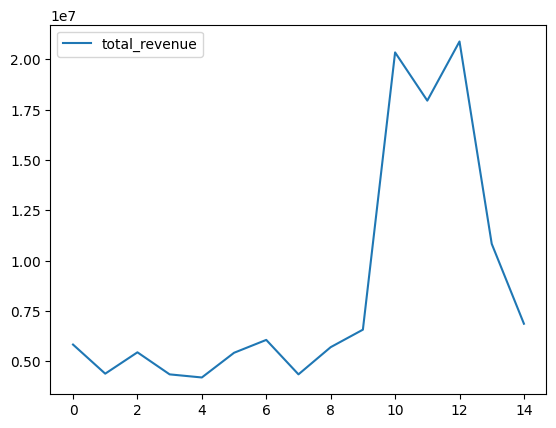

In [26]:
revenue_month.plot.line()

In [27]:
total_revenue_all = test_df['total_paid'].sum()

In [28]:
revenue_month['revenue_pct'] = (revenue_month['total_revenue'] / total_revenue_all) * 100

# Round for readability
revenue_month['revenue_pct'] = revenue_month['revenue_pct'].round(2)

In [29]:
revenue_month

,year_month,total_revenue,revenue_pct
0,2017-01,5828009.63,4.51
1,2017-02,4381659.50,3.39
2,2017-03,5443135.81,4.21
3,2017-04,4346977.33,3.37
4,2017-05,4192663.00,3.25
5,2017-06,5420121.10,4.20
6,2017-07,6059333.83,4.69
7,2017-08,4347651.57,3.37
8,2017-09,5698729.41,4.41
9,2017-10,6567947.29,5.09


In [30]:
revenue_orders_month = test_df.groupby('year_month').agg(
    total_revenue=('total_paid', 'sum'),
    total_orders=('order_id', 'nunique')).reset_index()   # use nunique to count unique orders

revenue_orders_month.rename(columns={'total_paid': 'total_revenue','order_id':'total_orders'}, inplace=True)
revenue_orders_month

,year_month,total_revenue,total_orders
0,2017-01,5828009.63,17346
1,2017-02,4381659.50,11376
2,2017-03,5443135.81,10018
3,2017-04,4346977.33,9255
4,2017-05,4192663.00,8932
5,2017-06,5420121.10,9078
6,2017-07,6059333.83,12435
7,2017-08,4347651.57,9381
8,2017-09,5698729.41,10372
9,2017-10,6567947.29,12514


Text(0.5, 1.0, 'Monthly Revenue vs Orders (Dual axis)')

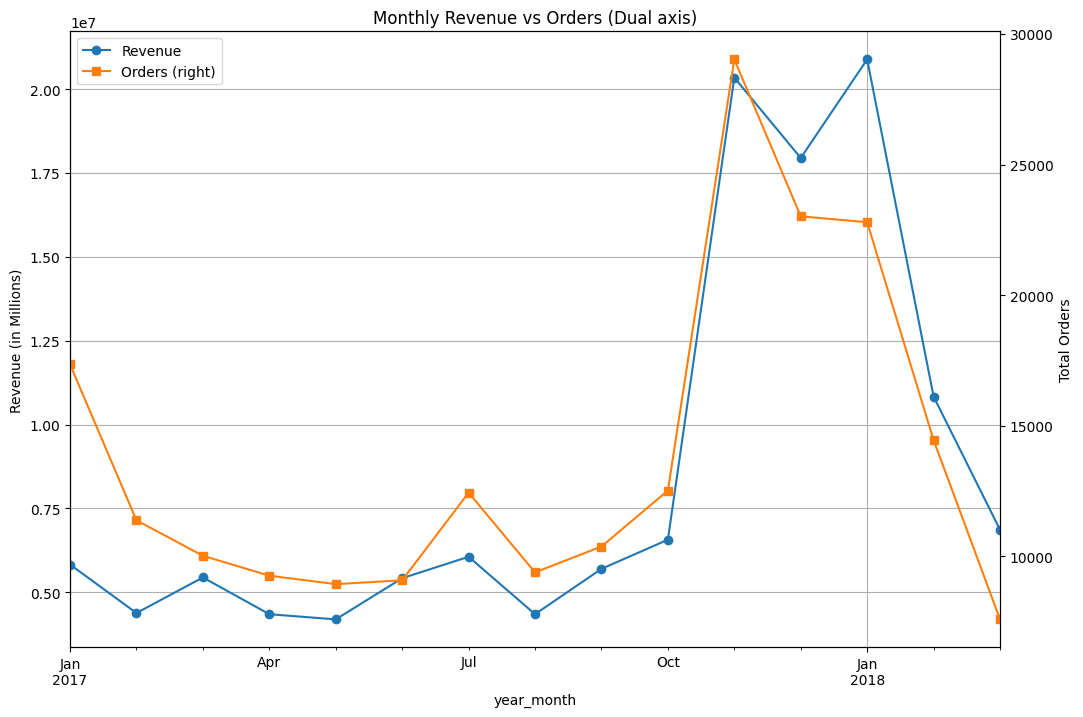

In [31]:
ax = revenue_orders_month.plot(
    x='year_month',
    y='total_revenue',
    kind='line',
    marker='o',
    figsize=(12,8),
    grid=True,
    label = 'Revenue'
)
revenue_orders_month.plot(
    x='year_month',
    y='total_orders',
    kind='line',
    marker='s',
    ax=ax,
    secondary_y=True,
    label='Orders'
)
ax.set_ylabel('Revenue (in Millions)')
ax.right_ax.set_ylabel('Total Orders')
ax.set_title('Monthly Revenue vs Orders (Dual axis)')


Revenue based on state:

In [32]:
rev_state = test_df.groupby('state')['total_paid'].sum().reset_index()
rev_state.rename(columns={'total_paid': 'total_revenue'}, inplace=True)
rev_state

,state,total_revenue
0,Cancelled,5545816.86
1,Completed,15910079.24
2,Pending,4703300.72
3,Place Order,17087858.32
4,Shopping Basket,85912559.93


In [33]:
rev_state['revenue_pct'] = (rev_state['total_revenue'] / total_revenue_all) * 100
rev_state

,state,total_revenue,revenue_pct
0,Cancelled,5545816.86,4.293770
1,Completed,15910079.24,12.318153
2,Pending,4703300.72,3.641464
3,Place Order,17087858.32,13.230032
4,Shopping Basket,85912559.93,66.516581


In [34]:
pd.options.display.max_rows = 100

In [35]:
orders_by_state = (
    test_df.groupby(['year_month','state'])['order_id']
    .nunique()
    .reset_index()
)

pivot_state = orders_by_state.pivot(
    index='year_month',
    columns='state',
    values='order_id'
).fillna(0).reset_index()

pivot_state

state,year_month,Cancelled,Completed,Pending,Place Order,Shopping Basket
0,2017-01,534,5133,474,2783,8422
1,2017-02,299,2273,1234,1886,5684
2,2017-03,390,202,2786,1637,5003
3,2017-04,313,1632,1231,1337,4742
4,2017-05,336,1892,1087,1242,4375
5,2017-06,350,1603,1065,1438,4622
6,2017-07,468,3439,598,1877,6053
7,2017-08,329,2350,390,1352,4960
8,2017-09,384,2180,811,1572,5425
9,2017-10,580,3135,523,1961,6315


<Axes: title={'center': 'Monthly Orders by State'}, xlabel='year_month'>

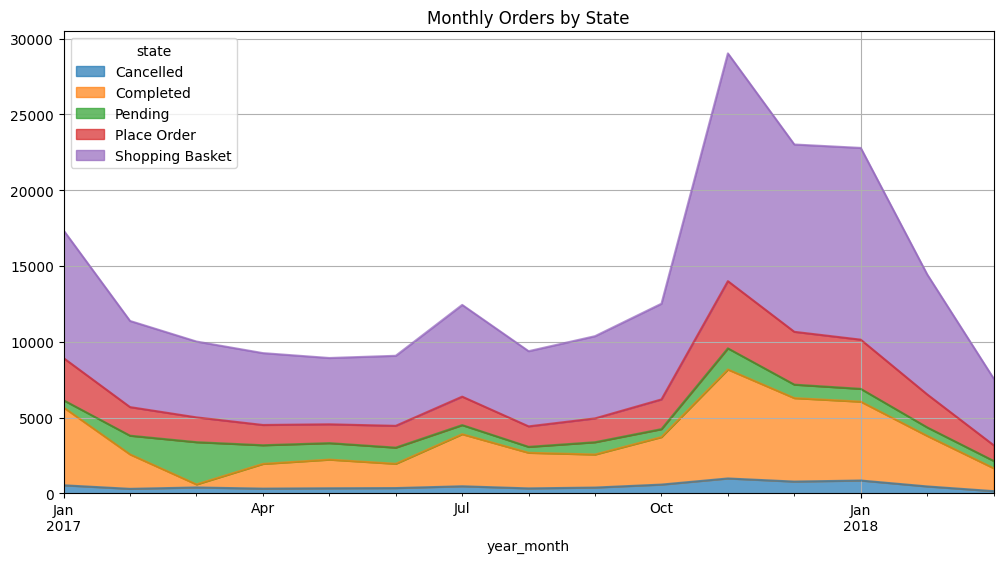

In [36]:
pivot_state.set_index('year_month').plot(
    kind='area',
    stacked=True,
    figsize=(12,6),
    alpha=0.7,   # transparency for clarity
    grid=True,
    title="Monthly Orders by State"
)

<Axes: title={'center': 'Monthly Orders by State'}, xlabel='year_month'>

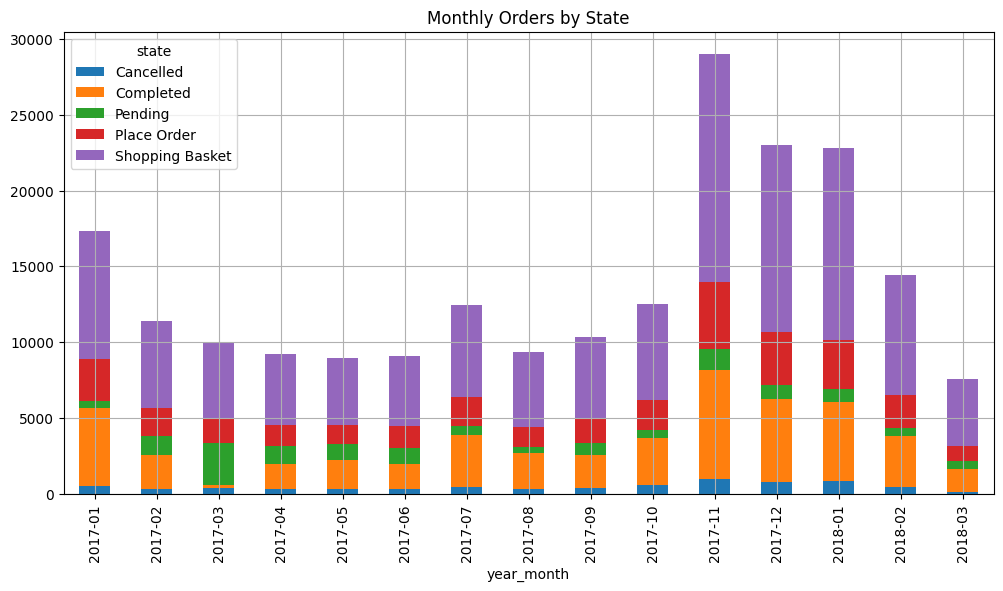

In [37]:
pivot_state.set_index('year_month').plot(
    kind='bar',
    stacked=True,
    figsize=(12,6),
    grid=True,
    title="Monthly Orders by State"
)

In [38]:
orders_state = test_df.loc[(test_df['state'] == 'Completed') | (test_df['state'] == 'Place Order'), :]
orders_state

,order_id,created_date,total_paid,state,year_month
1,241423,2017-11-06 13:10:02,136.15,Completed,2017-11
2,242832,2017-12-31 17:40:03,15.76,Completed,2017-12
3,243330,2017-02-16 10:59:38,84.98,Completed,2017-02
5,245275,2017-06-28 11:35:37,149.00,Completed,2017-06
6,245595,2017-01-21 12:52:47,112.97,Completed,2017-01
...,...,...,...,...,...
226893,527386,2018-03-14 13:49:48,161.00,Place Order,2018-03
226901,527394,2018-03-14 13:55:15,161.00,Place Order,2018-03
226903,527396,2018-03-14 13:55:44,141.58,Place Order,2018-03
226904,527397,2018-03-14 13:56:38,42.99,Place Order,2018-03


38% of orders were placed and completed.
Considering only these states for revenue, because that's the actual amount and orders we received and calculating revenue and orders for these.

In [39]:
revenue_orders_month_state = orders_state.groupby('year_month').agg(
    total_revenue=('total_paid', 'sum'),
    total_orders=('order_id', 'nunique')).reset_index()   # use nunique to count unique orders

revenue_orders_month_state.rename(columns={'total_paid': 'total_revenue','order_id':'total_orders'}, inplace=True)
revenue_orders_month_state

,year_month,total_revenue,total_orders
0,2017-01,2178715.12,7916
1,2017-02,1433827.22,4159
2,2017-03,1035695.60,1839
3,2017-04,1211174.02,2969
4,2017-05,1275780.53,3134
5,2017-06,1648592.55,3041
6,2017-07,2193172.33,5316
7,2017-08,1452004.49,3702
8,2017-09,1867533.30,3752
9,2017-10,2184794.33,5096


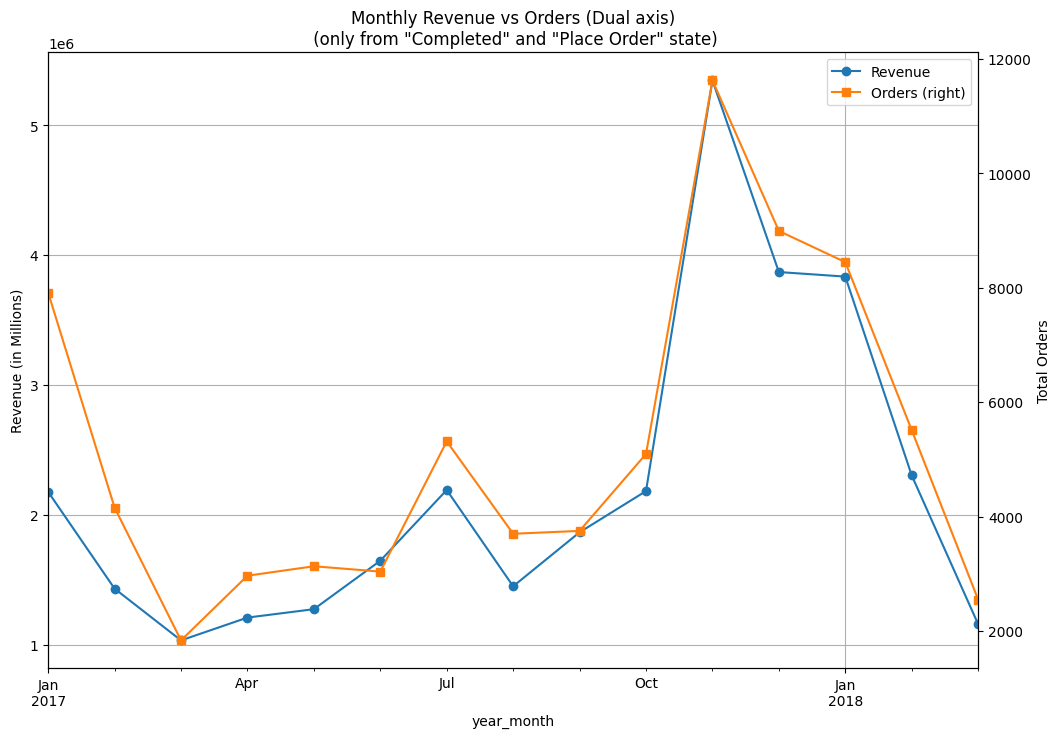

In [40]:
ax_state = revenue_orders_month_state.plot(
    x='year_month',
    y='total_revenue',
    kind='line',
    marker='o',
    figsize=(12,8),
    grid=True,
    label = 'Revenue'
)
revenue_orders_month_state.plot(
    x='year_month',
    y='total_orders',
    kind='line',
    marker='s',
    ax=ax_state,
    secondary_y=True,
    label='Orders'
)
ax_state.set_ylabel('Revenue (in Millions)')
ax_state.right_ax.set_ylabel('Total Orders')
ax_state.set_title('Monthly Revenue vs Orders (Dual axis)\n (only from "Completed" and "Place Order" state)');

In [ ]:
test_df